In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.classify import NaiveBayesClassifier
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 
from sklearn.feature_extraction.text import TfidfVectorizer

In [173]:
df = pd.read_csv('disease symptom prediction/dataset.csv')

In [174]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df.info()
# LIHAT DISTRIBUSI DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


# VISUALISASI DISTRIBUSI DATA

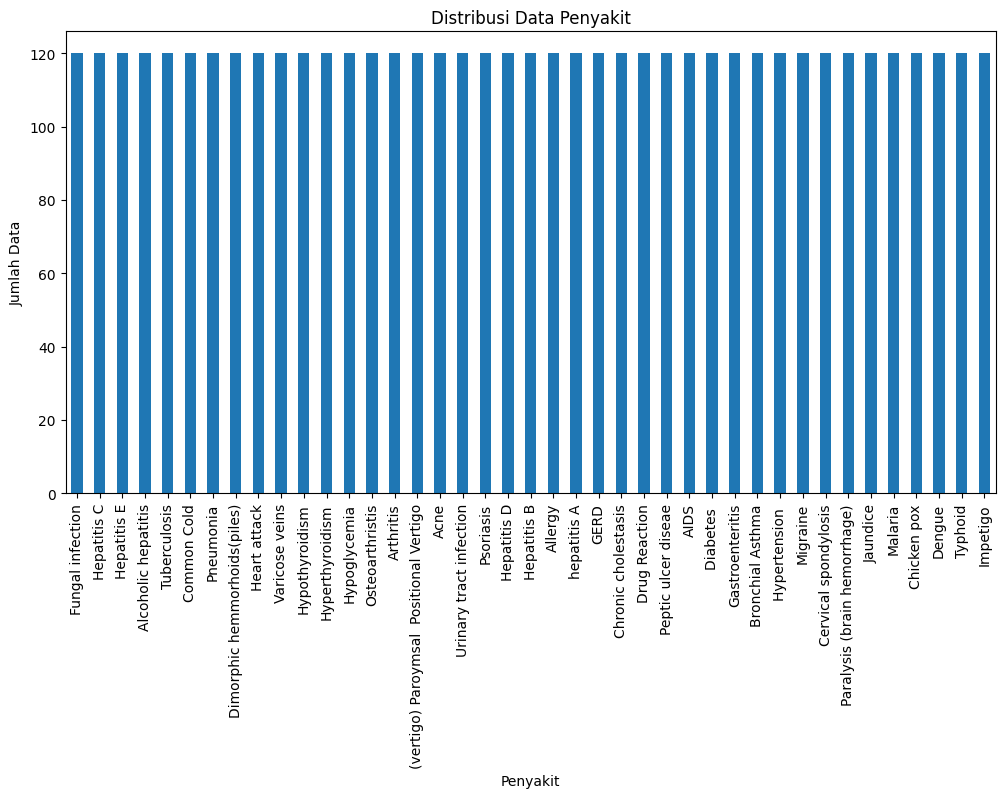

In [176]:
disease_count = df['Disease'].value_counts()

plt.figure(figsize=(12, 6))
disease_count.plot(kind='bar')
plt.title('Distribusi Data Penyakit')
plt.xlabel('Penyakit')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=90)
plt.show()

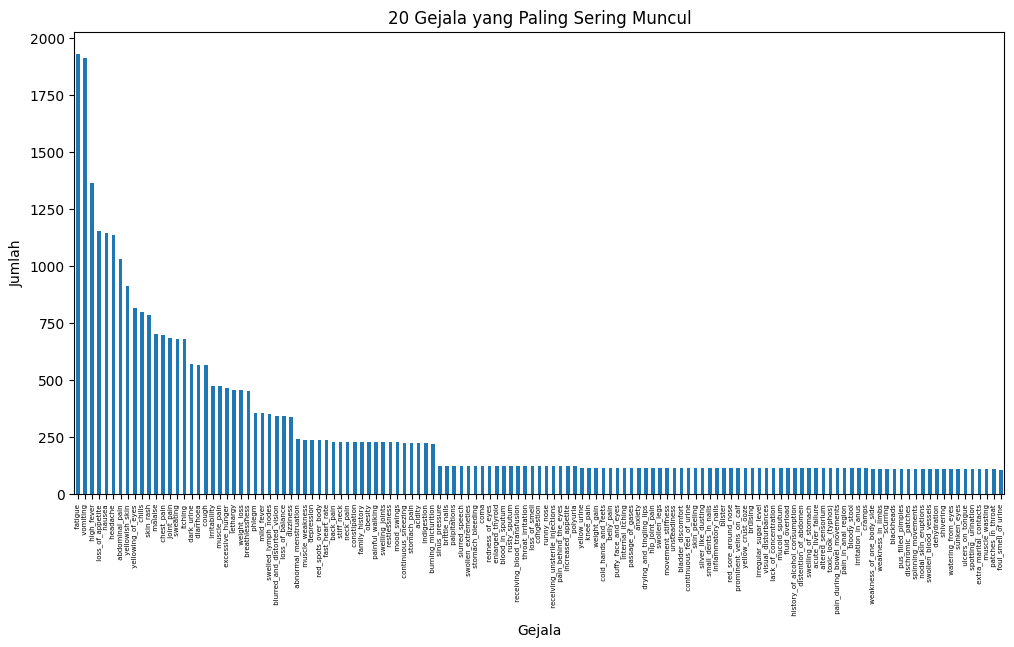

In [177]:
# Gabungkan semua kolom symptoms source gpt
symptom_counts = df[symp_cols].stack().value_counts()

# Plot
plt.figure(figsize=(12,6))
symptom_counts.plot(kind='bar')
plt.title('20 Gejala yang Paling Sering Muncul')
plt.xlabel('Gejala')
plt.ylabel('Jumlah')
plt.xticks(rotation=90, fontsize=5)
plt.show()

# DATA CLEANING

ganti _ jadi spasi di isi symptoms

In [178]:
for i in range(1, 18):
    df[f'Symptom_{i}'] = df[f'Symptom_{i}'].str.replace('_', ' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


isi NaN jadi 'None' (jangan dihapus)

In [179]:
symp_cols = [f'Symptom_{i}' for i in range(1, 18)]
df[symp_cols] = df[symp_cols].fillna('none')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none
3,Fungal infection,itching,skin rash,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none
4,Fungal infection,itching,skin rash,nodal skin eruptions,none,none,none,none,none,none,none,none,none,none,none,none,none,none


lowercase, tokenize, lemmatize

In [180]:
#gabungin semua symptoms ke satu list
df['all_symptoms'] = df[symp_cols].agg(' '.join, axis=1)
print(df['all_symptoms'])

0       itching  skin rash  nodal skin eruptions  disc...
1        skin rash  nodal skin eruptions  dischromic  ...
2       itching  nodal skin eruptions  dischromic  pat...
3       itching  skin rash  dischromic  patches none n...
4       itching  skin rash  nodal skin eruptions none ...
                              ...                        
4915     vomiting  headache  nausea  spinning movement...
4916     skin rash  pus filled pimples  blackheads  sc...
4917     burning micturition  bladder discomfort  foul...
4918     skin rash  joint pain  skin peeling  silver l...
4919     skin rash  high fever  blister  red sore arou...
Name: all_symptoms, Length: 4920, dtype: object


In [181]:
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

def clean_text(text):
    words = text.lower().split()
    stemmed = [stemmer.stem(word) for word in words]
    lemmatized = [lemma.lemmatize(word) for word in stemmed]
    return ' '.join(lemmatized)

df['all_symptoms'] = df['all_symptoms'].apply(clean_text)

df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,all_symptoms
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,itch skin rash nodal skin erupt dischrom patch...
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,skin rash nodal skin erupt dischrom patch none...
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,itch nodal skin erupt dischrom patch none none...
3,Fungal infection,itching,skin rash,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,itch skin rash dischrom patch none none none n...
4,Fungal infection,itching,skin rash,nodal skin eruptions,none,none,none,none,none,none,none,none,none,none,none,none,none,none,itch skin rash nodal skin erupt none none none...


apus baris yang symptoms nya kurang dari 5

In [182]:
# Menghitung jumlah gejala yang valid (selain 'no symptom' dan NaN) di setiap baris
valid_symptom_counts = df[symp_cols].apply(lambda row: (row != 'no symptom').sum(), axis=1)

# Hapus baris yang memiliki kurang dari 5 gejala valid
df = df[valid_symptom_counts >= 5]

df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,all_symptoms
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,itch skin rash nodal skin erupt dischrom patch...
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,skin rash nodal skin erupt dischrom patch none...
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,itch nodal skin erupt dischrom patch none none...
3,Fungal infection,itching,skin rash,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,itch skin rash dischrom patch none none none n...
4,Fungal infection,itching,skin rash,nodal skin eruptions,none,none,none,none,none,none,none,none,none,none,none,none,none,none,itch skin rash nodal skin erupt none none none...


encode

In [183]:
# Ganti nilai yang tidak sesuai dengan 'no_symptom' source gpt
df[symp_cols] = df[symp_cols].apply(lambda col: col.replace('130', 'no_symptom'))

In [184]:
#encode symptoms jadi angka
# symp_encoder = LabelEncoder()

# # encode symptoms
# for col in symp_cols:
#     df[col] = symp_encoder.fit_transform(df[col].fillna('no_symptom'))

#encode disease
disease_encoder = LabelEncoder()
df['Disease'] = disease_encoder.fit_transform(df['Disease'])

df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,all_symptoms
0,15,itching,skin rash,nodal skin eruptions,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,itch skin rash nodal skin erupt dischrom patch...
1,15,skin rash,nodal skin eruptions,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,skin rash nodal skin erupt dischrom patch none...
2,15,itching,nodal skin eruptions,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,itch nodal skin erupt dischrom patch none none...
3,15,itching,skin rash,dischromic patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none,itch skin rash dischrom patch none none none n...
4,15,itching,skin rash,nodal skin eruptions,none,none,none,none,none,none,none,none,none,none,none,none,none,none,itch skin rash nodal skin erupt none none none...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,vomiting,headache,nausea,spinning movements,loss of balance,unsteadiness,none,none,none,none,none,none,none,none,none,none,none,vomit headach nausea spin movement loss of bal...
4916,2,skin rash,pus filled pimples,blackheads,scurring,none,none,none,none,none,none,none,none,none,none,none,none,none,skin rash pu fill pimpl blackhead scur none no...
4917,38,burning micturition,bladder discomfort,foul smell of urine,continuous feel of urine,none,none,none,none,none,none,none,none,none,none,none,none,none,burn micturit bladder discomfort foul smell of...
4918,35,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,none,none,none,none,none,none,none,none,none,none,none,skin rash joint pain skin peel silver like dus...


cek total data

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       4920 non-null   int32 
 1   Symptom_1     4920 non-null   object
 2   Symptom_2     4920 non-null   object
 3   Symptom_3     4920 non-null   object
 4   Symptom_4     4920 non-null   object
 5   Symptom_5     4920 non-null   object
 6   Symptom_6     4920 non-null   object
 7   Symptom_7     4920 non-null   object
 8   Symptom_8     4920 non-null   object
 9   Symptom_9     4920 non-null   object
 10  Symptom_10    4920 non-null   object
 11  Symptom_11    4920 non-null   object
 12  Symptom_12    4920 non-null   object
 13  Symptom_13    4920 non-null   object
 14  Symptom_14    4920 non-null   object
 15  Symptom_15    4920 non-null   object
 16  Symptom_16    4920 non-null   object
 17  Symptom_17    4920 non-null   object
 18  all_symptoms  4920 non-null   object
dtypes: int

# TRAINING

split data set (2:8)

In [186]:
#tfidf vector
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['all_symptoms'])
y = df['Disease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

train model

In [187]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

predict & eval

In [188]:
y_pred = nb_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f'1st try Accuracy = {acc}')

1st try Accuracy = 1.0


# DIJADIIN CHATBOT

In [ ]:
print("Hello! I'm your new health assitant!")
print('Type your symptoms (seperate with coma), ex: itching, skin rash, vomit')
print('Input EXIT for exit the program\n')

while True:
    user_input = input('What are you feeling right now? ')
    print(user_input)
    
    if user_input.lower() == 'exit':
        print("Thankyou for consulting with me! Get well soon ;)")
        break

    user_input_clean = clean_text(user_input)
    user_input_vector = tfidf.transform([user_input_clean])

    #predict
    pred = nb_model.predict(user_input_vector)
    result = disease_encoder.inverse_transform(pred)[0] #ambil result pertama

    print(f"Your prediction: {result}\n")
    

Hello! I'm your new health assitant!
Type your symptoms (seperate with coma), ex: itching, skin rash, vomit
Input EXIT for exit the program

shivering, chills
Your prediction: Malaria**

itchy, vomit, skin rash
Your prediction: Dengue**

acidity, stiff neck, depression, back pain
Your prediction: Arthritis**

exit
Thankyou for consulting with me! Get well soon ;)
